In [1]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

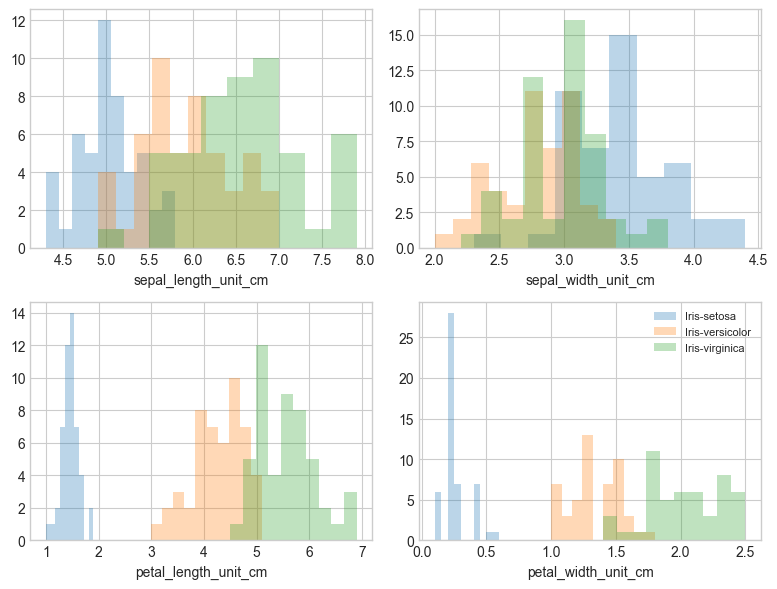

In [2]:
# original dataset downloaded from 
# https://archive.ics.uci.edu/ml/datasets/Iris
# iris.data columns are descriobed inside :./input_data/iris.names

df = pd.read_csv("./input_data/iris.data",
                sep = ",",
                header = None
                )

df.columns = ['sepal_length_unit_cm','sepal_width_unit_cm',
              'petal_length_unit_cm','petal_width_unit_cm',
              'iris_type']

# print(df.shape)
# print(df.head())
# print(df.tail())
# print([col for col in df.columns])

#Total unique class
class_label = df.iris_type.unique().tolist()
# print(class_label)

#data feature for 3 class
feature_label = df.columns.tolist()[:4]
# print(feature_label)

X = df.iloc[:,0:4].values
# print(X)
y = df.iloc[:,4].values
# print(y)


#Explore 4 column (2 x sepal and 2 x petal ) features for 3 class
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(8, 6))
    for cnt in range(len(feature_label)):
        plt.subplot(2, 2, cnt+1)
        for lab in class_label:
            plt.hist(X[y==lab, cnt],
                     label=lab,
                     bins=10,
                     alpha=0.3,)
        plt.xlabel(feature_label[cnt])
    plt.legend(loc='upper right', fancybox=True, fontsize=8)

    plt.tight_layout()
    plt.show()

In [4]:
X_scaled = StandardScaler().fit_transform(X)
print(X_scaled)
mean_vec = np.mean(X_scaled, axis=0)
cov_mat = (X_scaled  - mean_vec).T.dot((X_scaled  - mean_vec)) / (X_scaled.shape[0]-1)
print('Covariance matrix \n%s' %cov_mat)

print('NumPy covariance matrix: \n%s' %np.cov(X_scaled.T))
cov_mat = np.cov(X_scaled.T)
eig_vals, eig_vecs = np.linalg.eig(cov_mat)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

#Eigendecomposition of the standardized data based on the correlation matrix:
cor_mat1 = np.corrcoef(X_scaled.T)

eig_vals, eig_vecs = np.linalg.eig(cor_mat1)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

[[-9.00681170e-01  1.03205722e+00 -1.34127240e+00 -1.31297673e+00]
 [-1.14301691e+00 -1.24957601e-01 -1.34127240e+00 -1.31297673e+00]
 [-1.38535265e+00  3.37848329e-01 -1.39813811e+00 -1.31297673e+00]
 [-1.50652052e+00  1.06445364e-01 -1.28440670e+00 -1.31297673e+00]
 [-1.02184904e+00  1.26346019e+00 -1.34127240e+00 -1.31297673e+00]
 [-5.37177559e-01  1.95766909e+00 -1.17067529e+00 -1.05003079e+00]
 [-1.50652052e+00  8.00654259e-01 -1.34127240e+00 -1.18150376e+00]
 [-1.02184904e+00  8.00654259e-01 -1.28440670e+00 -1.31297673e+00]
 [-1.74885626e+00 -3.56360566e-01 -1.34127240e+00 -1.31297673e+00]
 [-1.14301691e+00  1.06445364e-01 -1.28440670e+00 -1.44444970e+00]
 [-5.37177559e-01  1.49486315e+00 -1.28440670e+00 -1.31297673e+00]
 [-1.26418478e+00  8.00654259e-01 -1.22754100e+00 -1.31297673e+00]
 [-1.26418478e+00 -1.24957601e-01 -1.34127240e+00 -1.44444970e+00]
 [-1.87002413e+00 -1.24957601e-01 -1.51186952e+00 -1.44444970e+00]
 [-5.25060772e-02  2.18907205e+00 -1.45500381e+00 -1.31297673e

[0 1 2 3]


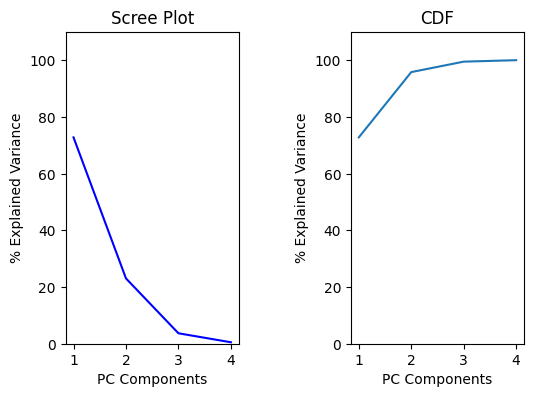

In [9]:
# Expained variance
tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print(np.arange(len(eig_pairs)))
#Figure 1, 2 subplots
fig, ax = plt.subplots(1, 2)
fig.tight_layout(pad=5.0)

#scree-plot
ax[0].plot(np.arange(len(eig_pairs))+1,var_exp, c="blue")
ax[0].set_ylabel('% Explained Variance')
ax[0].set_xlabel('PC Components')
ax[0].set_ylim([0, 110])
ax[0].title.set_text('Scree Plot')


#CDF
ax[1].plot(np.arange(len(eig_pairs))+1, cum_var_exp)
ax[1].set_ylabel('% Explained Variance')
ax[1].set_xlabel('PC Components')
ax[1].set_ylim([0, 110])
ax[1].title.set_text('CDF')
plt.show()



Matrix W:
 [[ 0.52237162 -0.37231836]
 [-0.26335492 -0.92555649]
 [ 0.58125401 -0.02109478]
 [ 0.56561105 -0.06541577]]


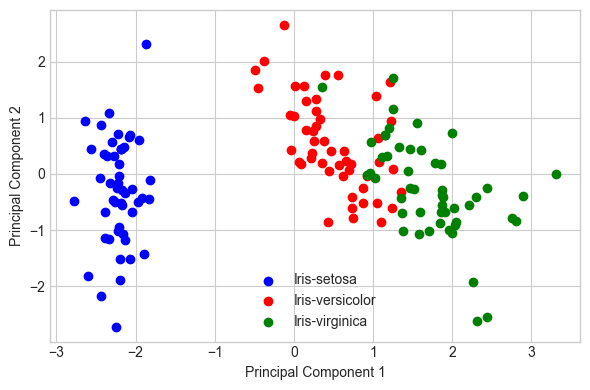

In [6]:
matrix_w = np.hstack((eig_pairs[0][1].reshape(4,1),
                      eig_pairs[1][1].reshape(4,1)))
print('Matrix W:\n', matrix_w)
Y = X_scaled.dot(matrix_w)
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 4))
    for lab, col in zip(('Iris-setosa', 'Iris-versicolor', 'Iris-virginica'),
                        ('blue', 'red', 'green')):
        plt.scatter(Y[y==lab, 0],
                    Y[y==lab, 1],
                    label=lab,
                    c=col)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend(loc='lower center')
    plt.tight_layout()
    plt.show()